Enter the main text:
ababcabcabababdabcababdabababcabc
Enter 4 patterns to search:
Pattern 1: ababc
Pattern 2: ababd
Pattern 3: abc
Pattern 4: xyz

--- Pattern 1: 'ababc' ---
Naive found at [0, 25], Time: 0.000030 sec
KMP found at [0, 25], Time: 0.000027 sec
Rabin-Karp found at [0, 25], Time: 0.000031 sec

--- Pattern 2: 'ababd' ---
Naive found at [10, 18], Time: 0.000022 sec
KMP found at [10, 18], Time: 0.000022 sec
Rabin-Karp found at [10, 18], Time: 0.000024 sec

--- Pattern 3: 'abc' ---
Naive found at [2, 5, 15, 27, 30], Time: 0.000020 sec
KMP found at [2, 5, 15, 27, 30], Time: 0.000020 sec
Rabin-Karp found at [2, 5, 15, 27, 30], Time: 0.000022 sec

--- Pattern 4: 'xyz' ---
Naive found at [], Time: 0.000016 sec
KMP found at [], Time: 0.000018 sec
Rabin-Karp found at [], Time: 0.000020 sec


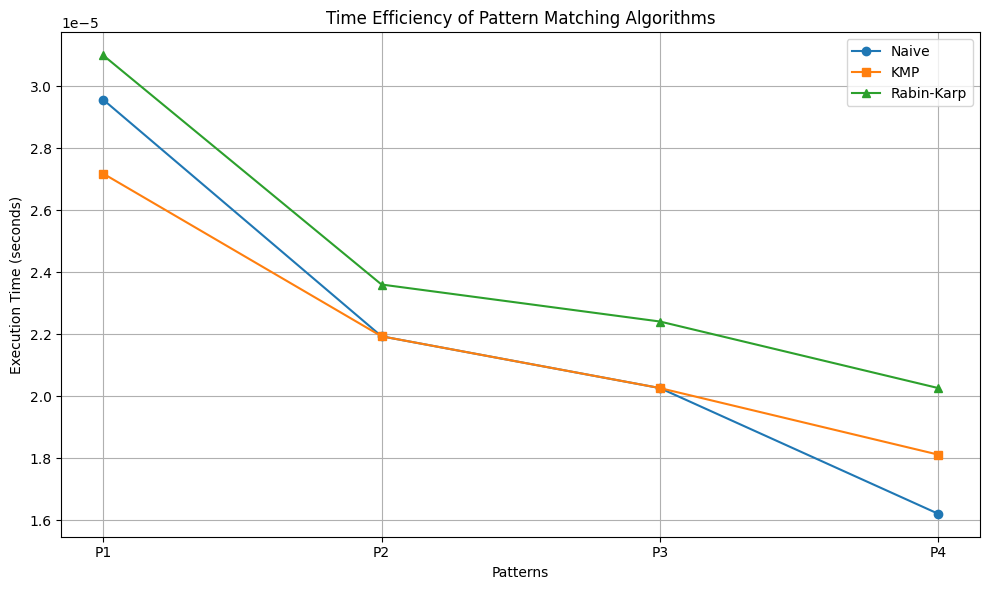

In [1]:
import time
import matplotlib.pyplot as plt

def naive_search(pat, txt):
    m, n = len(pat), len(txt)
    positions = []
    for i in range(n - m + 1):
        match = True
        for j in range(m):
            if txt[i + j] != pat[j]:
                match = False
                break
        if match:
            positions.append(i)
    return positions

def compute_lps_array(pat):
    m = len(pat)
    lps = [0] * m
    length = 0
    i = 1
    while i < m:
        if pat[i] == pat[length]:
            length += 1
            lps[i] = length
            i += 1
        else:
            if length != 0:
                length = lps[length - 1]
            else:
                lps[i] = 0
                i += 1
    return lps

def kmp_search(pat, txt):
    m, n = len(pat), len(txt)
    lps = compute_lps_array(pat)
    i = j = 0
    positions = []
    while i < n:
        if pat[j] == txt[i]:
            i += 1
            j += 1
        if j == m:
            positions.append(i - j)
            j = lps[j - 1]
        elif i < n and pat[j] != txt[i]:
            if j != 0:
                j = lps[j - 1]
            else:
                i += 1
    return positions

def rabin_karp_search(pat, txt, q=101):
    d = 256
    m = len(pat)
    n = len(txt)
    p = 0
    t = 0
    h = 1
    positions = []

    for i in range(m - 1):
        h = (h * d) % q

    for i in range(m):
        p = (d * p + ord(pat[i])) % q
        t = (d * t + ord(txt[i])) % q

    for i in range(n - m + 1):
        if p == t:
            if txt[i:i+m] == pat:
                positions.append(i)
        if i < n - m:
            t = (d * (t - ord(txt[i]) * h) + ord(txt[i + m])) % q
            if t < 0:
                t = t + q
    return positions

txt = input("Enter the main text:\n")

patterns = []
print("Enter 4 patterns to search:")
for i in range(4):
    patterns.append(input(f"Pattern {i+1}: "))

naive_times, kmp_times, rk_times = [], [], []
for i, pat in enumerate(patterns):
    print(f"\n--- Pattern {i+1}: '{pat}' ---")

    start = time.time()
    naive_result = naive_search(pat, txt)
    end = time.time()
    naive_times.append(end - start)
    print(f"Naive found at {naive_result}, Time: {naive_times[-1]:.6f} sec")

    start = time.time()
    kmp_result = kmp_search(pat, txt)
    end = time.time()
    kmp_times.append(end - start)
    print(f"KMP found at {kmp_result}, Time: {kmp_times[-1]:.6f} sec")

    start = time.time()
    rk_result = rabin_karp_search(pat, txt)
    end = time.time()
    rk_times.append(end - start)
    print(f"Rabin-Karp found at {rk_result}, Time: {rk_times[-1]:.6f} sec")

patterns_label = [f'P{i+1}' for i in range(4)]
x = range(4)

plt.figure(figsize=(10, 6))
plt.plot(x, naive_times, marker='o', label='Naive')
plt.plot(x, kmp_times, marker='s', label='KMP')
plt.plot(x, rk_times, marker='^', label='Rabin-Karp')

plt.xticks(x, patterns_label)
plt.xlabel('Patterns')
plt.ylabel('Execution Time (seconds)')
plt.title('Time Efficiency of Pattern Matching Algorithms')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
